# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import keras
from keras import backend as K
from keras.layers import Input, Dense, Dropout
from keras.layers.advanced_activations import PReLU
from keras.models import Model
from keras.optimizers import Adamax
import math
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import matplotlib
import matplotlib.pyplot as plt


# 2. Import Triple combo data for training and validation


### 2.1. Define (data, fixed parameters, network architecture)

In [3]:
# Model fixed parameters
NInputs = 3 # Number of features (model inputs)
NOutputs = 1 # Number of targets (model outputs)

In [5]:
# Import training data (model inputs & outputs)
Feature = pd.read_excel('TrainingAndValFeature.xlsx', "Feature", header = None)
Feature = np.asarray(Feature)
Target = pd.read_excel('TrainingAndValTarget.xlsx', "Target", header = None)
Target = np.asarray(Target)
# Index and split training set into training and validation
indx = np.asarray(list(range(Feature.shape[0]))) # orig

indx2 = shuffle(indx)
NSamples = len(indx2)
train_index = indx2[0:int(0.8*NSamples)]
val_index = indx2[int(0.8*NSamples):]


XLRDError: Excel xlsx file; not supported

In [4]:
rate = 0.1

def nn():
    NN_ip = Input(shape=(NInputs,))
    x = Dense(100)(NN_ip)
    x = PReLU()(x)
    x = Dropout(rate)(x)
    x = Dense(100)(x)
    x = PReLU()(x)
    x = Dropout(rate)(x)
    NN_op = Dense(NOutputs)(x)
       
    NN_model = Model(NN_ip, NN_op)
    
    def loss_mse(true, pred):
        mean = pred[:, :NOutputs]
        return K.mean(K.square(true - mean), -1)

    def metric_mse(y_true, y_pred):
        mean = y_pred[:, :NOutputs]
        return K.mean(K.square(y_true - mean), -1)
    
    opt = Adamax(1e-3)
    
    NN_model.compile(loss = loss_mse, optimizer = opt, metrics = [metric_mse])
    
    return NN_model

NN = nn()
NN.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
p_re_lu_1 (PReLU)            (None, 100)               100       
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
p_re_lu_2 (PReLU)            (None, 100)               100       
_____________________________________________________

### 2.2. Train

In [5]:
Feature_Train, Feature_Val = Feature[train_index], Feature[val_index]
Target_Train, Target_Val = Target[train_index], Target[val_index]
               
NN = nn()

history = NN.fit(Feature_Train, Target_Train, 
                     epochs = 10, 
                     batch_size = int(Feature.shape[0]/8), 
                     shuffle = True, 
                     validation_data = (Feature_Val, Target_Val))
    


Instructions for updating:
Use tf.cast instead.
Train on 3200 samples, validate on 800 samples
Epoch 1/10
3200/3200 [==============================] - 1s 210us/step - loss: 0.0353 - metric_mse: 0.0353 - val_loss: 0.0124 - val_metric_mse: 0.0124
Epoch 2/10
3200/3200 [==============================] - 0s 16us/step - loss: 0.0081 - metric_mse: 0.0081 - val_loss: 0.0039 - val_metric_mse: 0.0039
Epoch 3/10
3200/3200 [==============================] - 0s 15us/step - loss: 0.0045 - metric_mse: 0.0045 - val_loss: 0.0037 - val_metric_mse: 0.0037
Epoch 4/10
3200/3200 [==============================] - 0s 16us/step - loss: 0.0038 - metric_mse: 0.0038 - val_loss: 0.0023 - val_metric_mse: 0.0023
Epoch 5/10
3200/3200 [==============================] - 0s 17us/step - loss: 0.0027 - metric_mse: 0.0027 - val_loss: 0.0018 - val_metric_mse: 0.0018
Epoch 6/10
3200/3200 [==============================] - 0s 16us/step - loss: 0.0026 - metric_mse: 0.0026 - val_loss: 0.0018 - val_metric_mse: 0.0018
Epoch 7/10

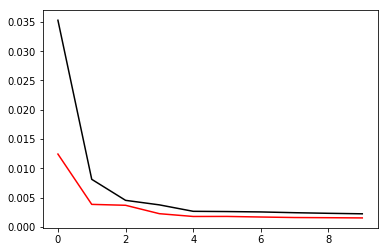

In [6]:
plt.plot(history.history['val_loss'][0:],'r')
plt.plot(history.history['loss'][0:],'k')

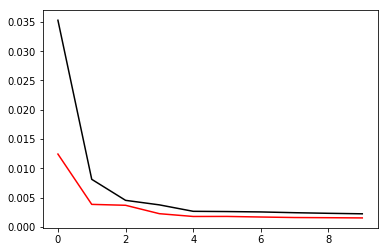

In [7]:
plt.plot(history.history['val_metric_mse'][0:],'r')
plt.plot(history.history['metric_mse'][0:],'k')

# 3. Import Test data

In [12]:
# Import training data (model inputs & outputs)
Test_Features = pd.read_excel('Test_Features.xlsx', "Feature", header = None)
Test_Features = np.asarray(Test_Features)
Test_Target = pd.read_excel('Test_Target.xlsx', "Target", header = None)
Test_Target = np.asarray(Test_Target)

In [13]:
PredictedTarget = NN.predict(Test_Features)

### 3.1 Plot the predicted target versus the Test_target

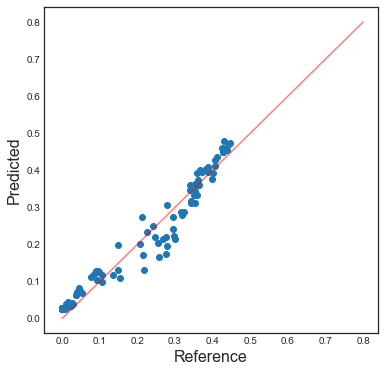

In [32]:
plt.figure(figsize = (6,6))
plt.style.use('seaborn-white')
plt.scatter(Test_Target, PredictedTarget)
plt.plot(np.linspace(0, 0.8, 2), np.linspace(0, 0.8, 2), color = 'r', alpha = 0.5)
plt.xlabel('Reference', FontSize = 16)
plt.ylabel('Predicted', FontSize = 16)
plt.show()


(100, 1)